In [6]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

In [7]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [8]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [9]:
bar_dui_city = """
SELECT
    FORMAT_DATE('%Y', `teamproject-428905.kim.dui_city`.`연도`) AS date,
    `teamproject-428905.kim.dui_city`.`서울` AS seoul_dui,
    `teamproject-428905.kim.bar_city`.`서울 ` AS seoul_bar,
    `teamproject-428905.kim.dui_city`.`부산` AS busan_dui,
    `teamproject-428905.kim.bar_city`.`부산` AS busan_bar,
    `teamproject-428905.kim.dui_city`.`대구` AS daegu_dui,
    `teamproject-428905.kim.bar_city`.`대구` AS daegu_bar,
    `teamproject-428905.kim.dui_city`.`인천` AS incheon_dui,
    `teamproject-428905.kim.bar_city`.`인천` AS incheon_bar,
    `teamproject-428905.kim.dui_city`.`광주` AS gwangju_dui,
    `teamproject-428905.kim.bar_city`.`광주` AS gwangju_bar,
    `teamproject-428905.kim.dui_city`.`대전` AS daejeon_dui,
    `teamproject-428905.kim.bar_city`.`대전` AS daejeon_bar,
    `teamproject-428905.kim.dui_city`.`울산` AS ulsan_dui,
    `teamproject-428905.kim.bar_city`.`울산` AS ulsan_bar,
    `teamproject-428905.kim.dui_city`.`세종` AS sejong_dui,
    `teamproject-428905.kim.bar_city`.`세종` AS sejong_bar,
    `teamproject-428905.kim.dui_city`.`경기` AS gyeonggi_dui,
    `teamproject-428905.kim.bar_city`.`경기` AS gyeonggi_bar,
    `teamproject-428905.kim.dui_city`.`강원` AS kangwon_dui,
    `teamproject-428905.kim.bar_city`.`강원` AS kangwon_bar,
    `teamproject-428905.kim.dui_city`.`충북` AS chungbuk_dui,
    `teamproject-428905.kim.bar_city`.`충북` AS chungbuk_bar,
    `teamproject-428905.kim.dui_city`.`충남` AS chungnam_dui,
    `teamproject-428905.kim.bar_city`.`충남` AS chungnam_bar,
    `teamproject-428905.kim.dui_city`.`전북` AS jeonbuk_dui,
    `teamproject-428905.kim.bar_city`.`전북` AS jeonbuk_bar,
    `teamproject-428905.kim.dui_city`.`전남` AS jeonnam_dui,
    `teamproject-428905.kim.bar_city`.`전남` AS jeonnam_bar,
    `teamproject-428905.kim.dui_city`.`경북` AS gyeongbuk_dui,
    `teamproject-428905.kim.bar_city`.`경북` AS gyeongbuk_bar,
    `teamproject-428905.kim.dui_city`.`경남` AS gyeongnam_dui,
    `teamproject-428905.kim.bar_city`.`경남` AS gyeongnam_bar,
    `teamproject-428905.kim.dui_city`.`제주` AS jeju_dui,
    `teamproject-428905.kim.bar_city`.`제주` AS jeju_bar
FROM
	`teamproject-428905.kim.dui_city`
JOIN
	`teamproject-428905.kim.bar_city`
ON
	FORMAT_DATE('%Y-%m', `teamproject-428905.kim.dui_city`.`연도`) = FORMAT_DATE('%Y-%m', `teamproject-428905.kim.bar_city`.`연도`)
"""

In [10]:
bd_city_df = client.query(bar_dui_city).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
bd_city_df = bd_city_df.set_index("date")

In [12]:
bd_city_df = bd_city_df.sort_values(by = "date", ascending = True)

In [13]:
bd_city_df

,seoul_dui,seoul_bar,busan_dui,busan_bar,daegu_dui,daegu_bar,incheon_dui,incheon_bar,gwangju_dui,gwangju_bar,...,jeonbuk_dui,jeonbuk_bar,jeonnam_dui,jeonnam_bar,gyeongbuk_dui,gyeongbuk_bar,gyeongnam_dui,gyeongnam_bar,jeju_dui,jeju_bar
date,,,,,,,,,,,,,,,,,,,,,
2016,2874,120870,789,38344,938,27196,1049,33441,764,20249,...,753,27967,904,33415,1268,47041,981,56525,365,14894
2017,2864,121759,709,38938,890,27557,1000,33688,688,20384,...,772,28170,905,33757,1207,47457,926,57532,319,15947
2018,2856,120626,743,38628,890,27402,938,33725,675,20050,...,683,27767,908,33169,1190,46539,958,57108,322,16518
2019,2190,122223,636,39785,702,27906,770,34849,549,20582,...,579,28357,793,33978,1060,47511,870,58225,296,17481
2020,2327,121961,742,40365,765,28027,879,35646,609,20621,...,617,28571,871,34330,1072,47814,1023,58500,362,18002
2021,2059,122340,637,48506,658,33244,771,36343,537,20940,...,523,28977,678,34965,899,48701,883,59607,324,18810


## 서울

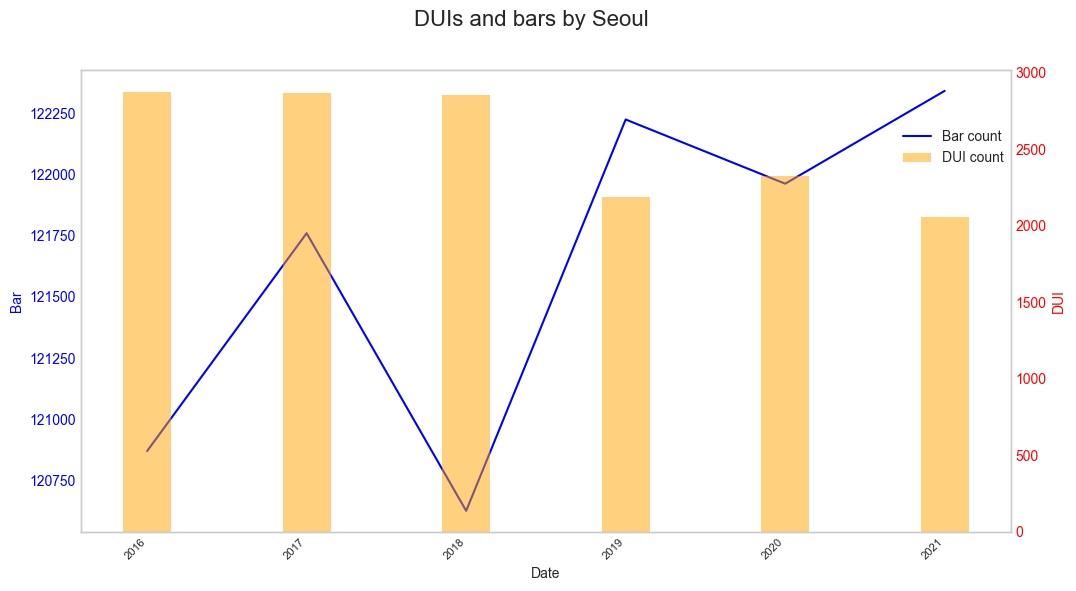

In [12]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['seoul_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['seoul_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Seoul', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 경기

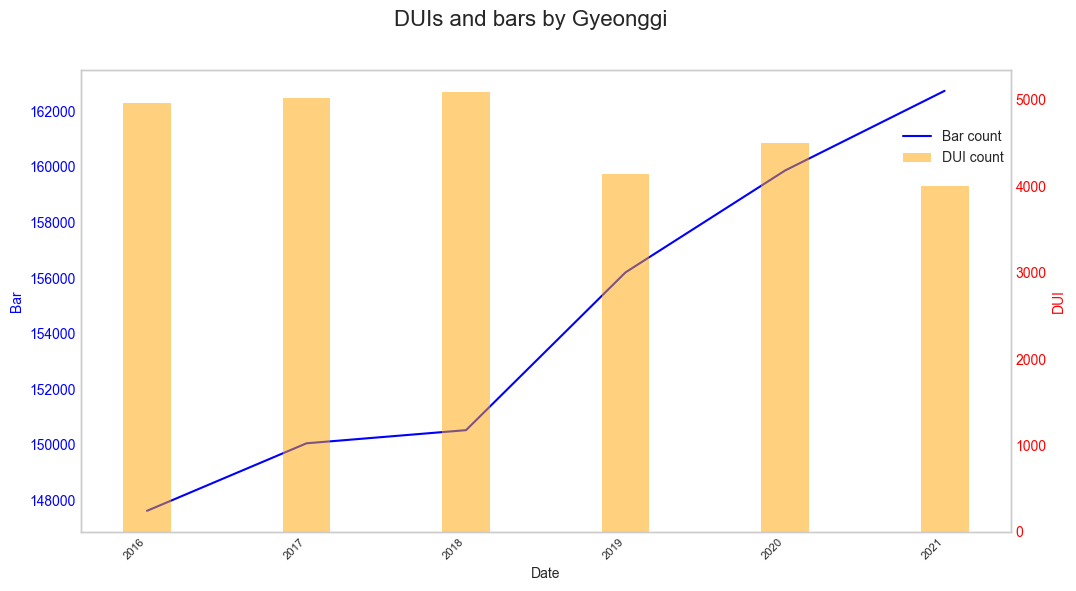

In [13]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['gyeonggi_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['gyeonggi_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Gyeonggi', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 강원

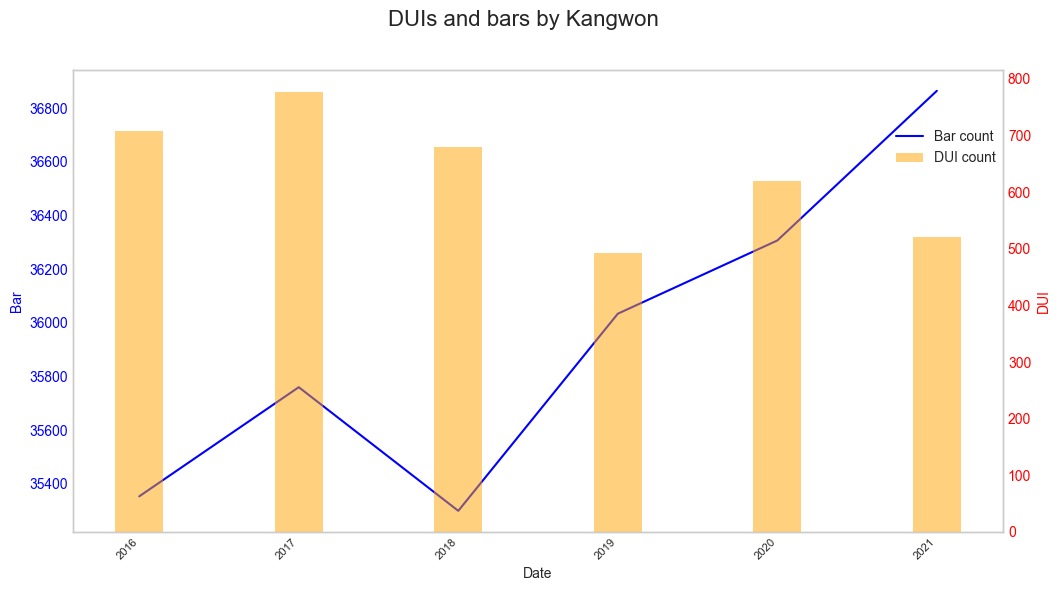

In [23]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['kangwon_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['kangwon_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Kangwon', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 충북

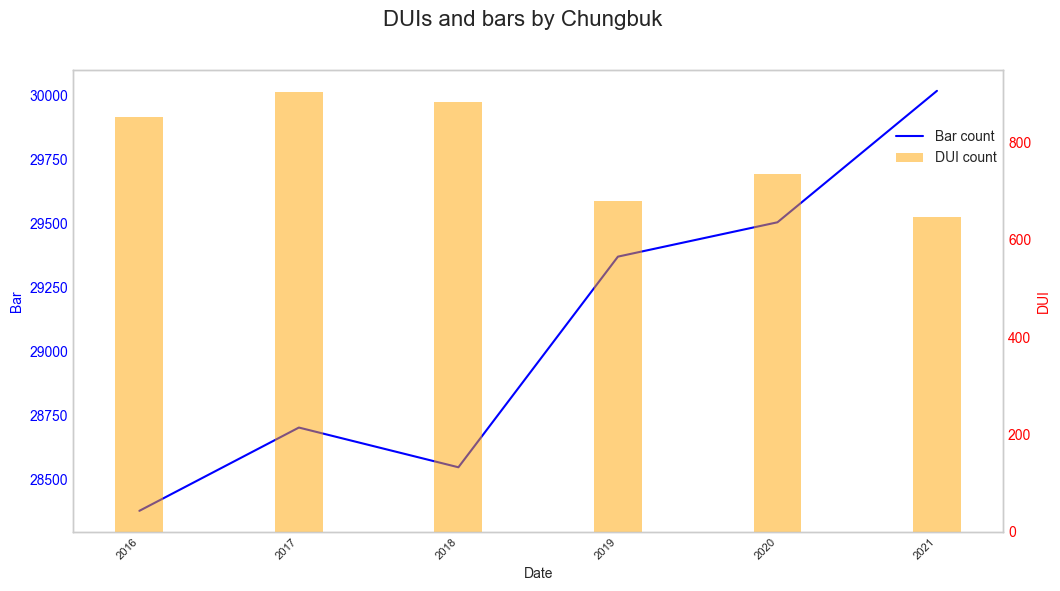

In [17]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['chungbuk_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['chungbuk_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Chungbuk', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 충남

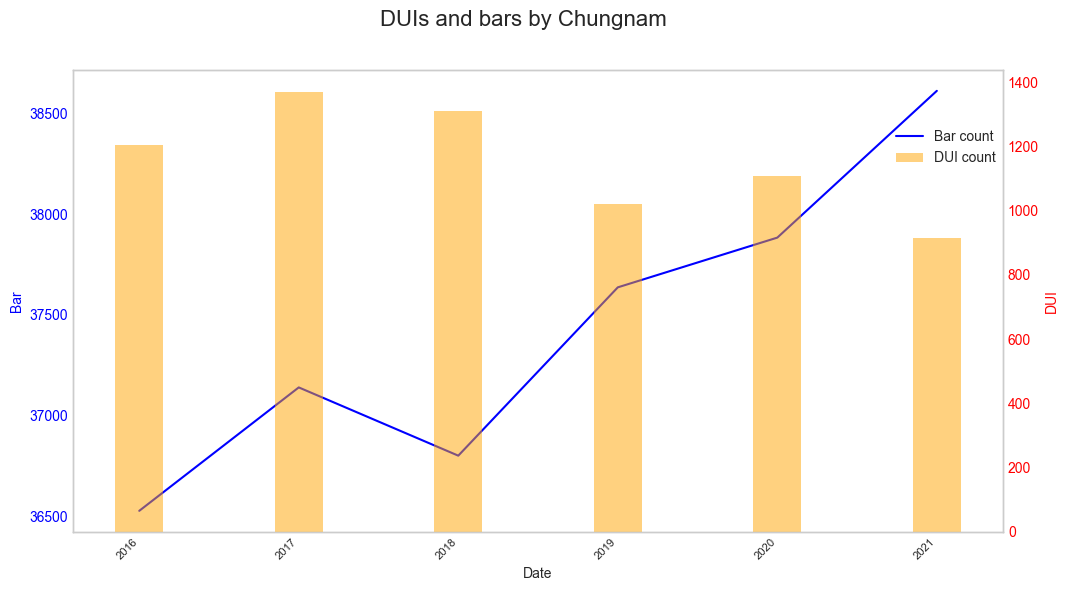

In [18]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['chungnam_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['chungnam_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Chungnam', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 광주

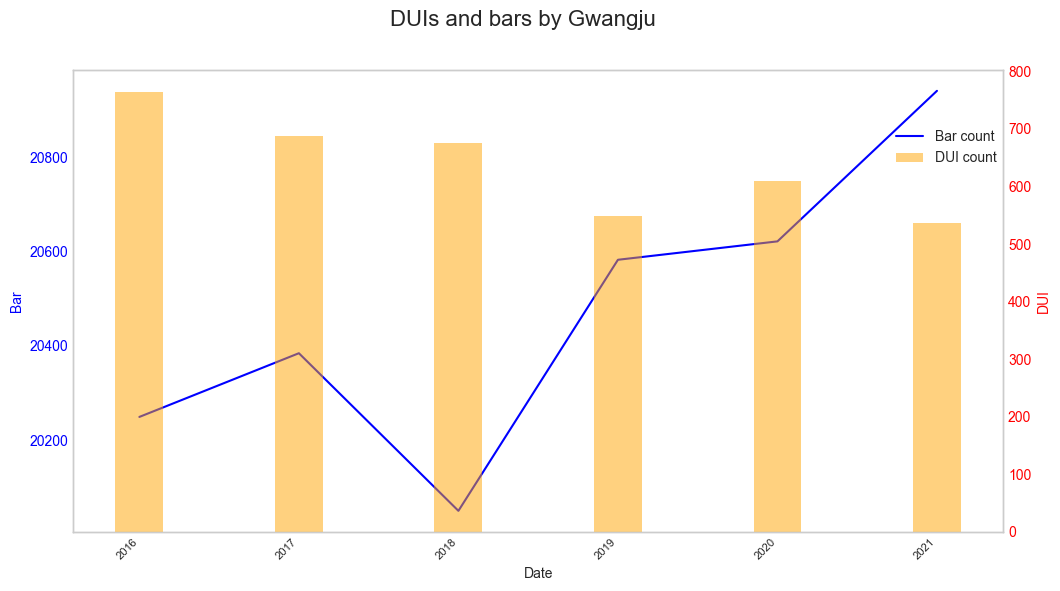

In [24]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['gwangju_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['gwangju_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Gwangju', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 울산

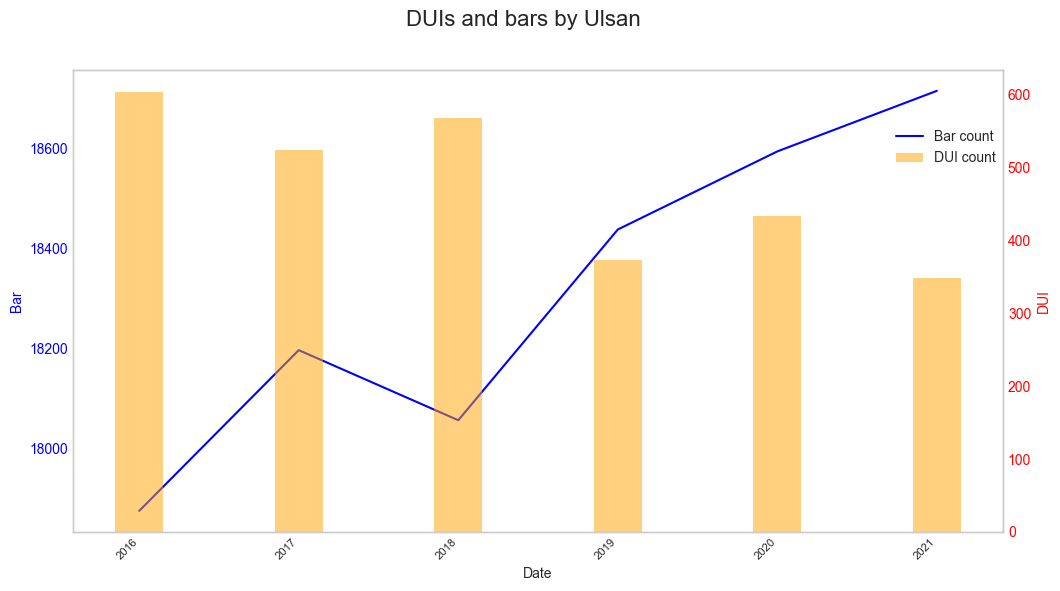

In [21]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['ulsan_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['ulsan_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Ulsan', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 부산

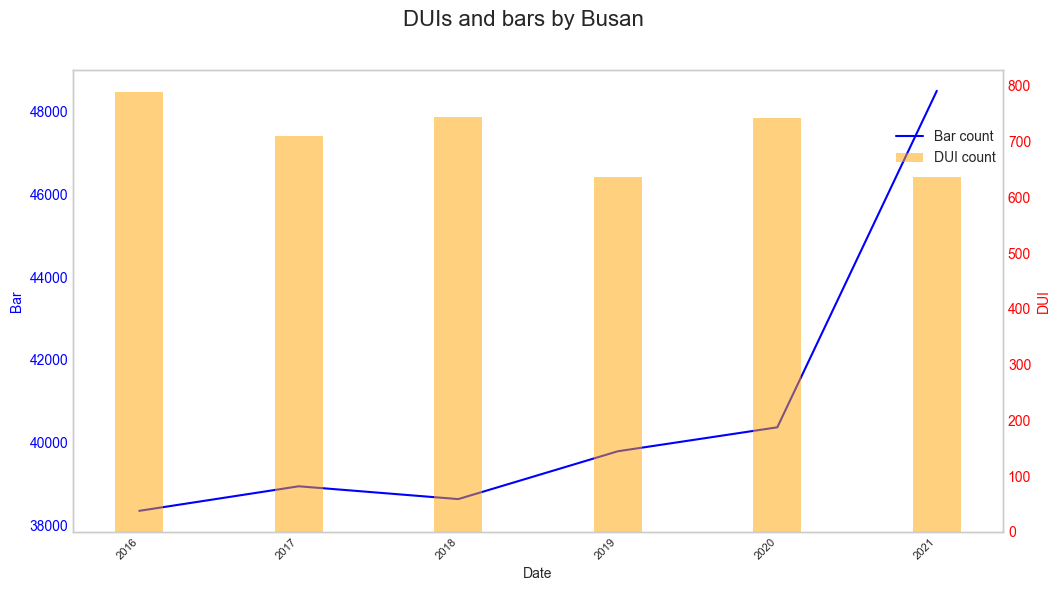

In [19]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['busan_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['busan_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Busan', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

## 제주

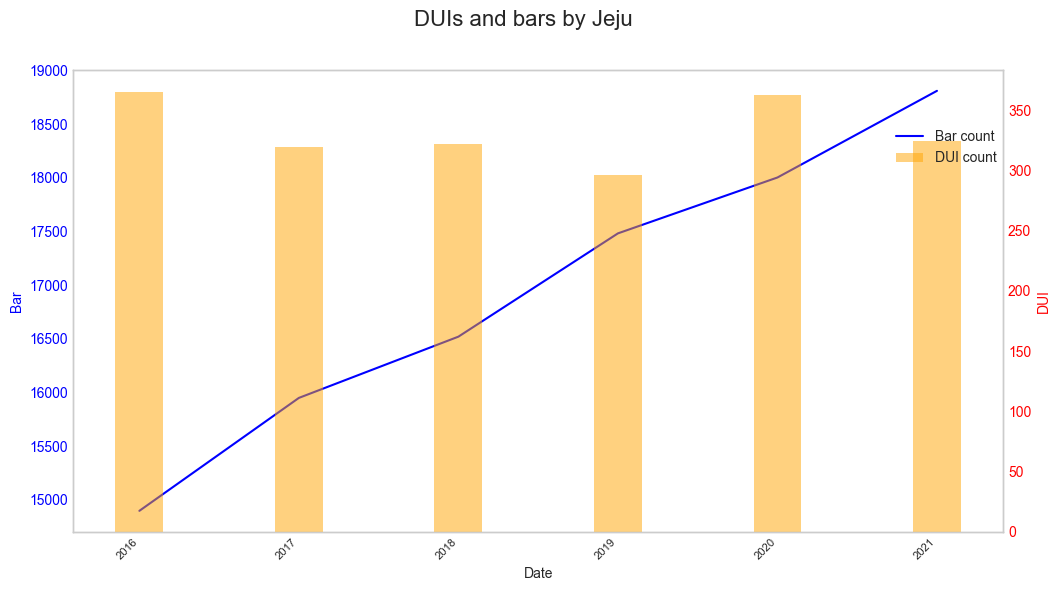

In [20]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(bd_city_df.index, bd_city_df['jeju_bar'], 'b-', label='Bar count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bar', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 8, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(bd_city_df.index, bd_city_df['jeju_dui'], width = 0.3, alpha = 0.5, color = "orange", label='DUI count')
ax2.set_ylabel('DUI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('DUIs and bars by Jeju', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))